Defining the chirp and snr functions.

In [4]:
def my_snr(signal,noisy_signal):
  noise=noisy_signal-signal
  signal_power=cp.mean(cp.power(cp.abs(signal),2))
  noise_power=cp.mean(cp.power(cp.abs(noise),2))
  snr=10*cp.log10(cp.abs(signal_power/noise_power))
  return snr
def my_chirp(t,T_c,f_s,f_m,B):
  i=1j
  signal = cp.exp(i*2*math.pi*(1/2*B/T_c*cp.power(t,2)+(f_m-B/2)*t))
  return signal

Making the sequence of chirps.

In [ ]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import cmath,math
T_c = 15.2*10**(-6)
f_s=2*10**9
t = cp.linspace(0, T_c, int(T_c * f_s), endpoint=False)
signal=cp.zeros(0)
my_m=[]
my_l=[]
for i in range(256):
  m=cp.random.randint(64)
  l=cp.random.randint(128)
  my_m.append(m)
  my_l.append(l)
  f_m=-100*10**6+200*10**6*m/64
  B=400*10**6+400*10**6*l/128
  my_signal=my_chirp(t,T_c,f_s,f_m,B)
  signal=cp.concatenate((signal,my_signal),axis=0)
  signal=cp.concatenate((signal,cp.zeros(int(10**(-7)*f_s))),axis=0)

Making all possible chirps signals.

In [ ]:
chirps=cp.zeros(shape=(128,64,int(T_c * f_s)))
for j in range(128):
    for k in range(64):
      f_m_chirp=-100*10**6+200*10**6*k/64
      B_chirp=400*10**6+400*10**6*j/128
      new_chirp=my_chirp(t,T_c,f_s,f_m_chirp,B_chirp)
      chirps[j][k]=new_chirp

<ipython-input-5-0160b51a398d>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  chirps[j][k]=new_chirp


Adding 0 dB noise.

In [ ]:
#noise 0 db : sigma=0.7
#noise 10 db : sigma=0.22
#noise 20 db : sigma=0.07
i=1j
sigma=0.7
noise_real=cp.random.normal(0,sigma,np.shape(signal)[0])
noise_image=cp.random.normal(0,sigma,np.shape(signal)[0])
noise=noise_real+i*noise_image
noisy_signal=signal+noise
print("The SNR : ",my_snr(signal,noisy_signal))

The SNR :  0.058257441270493725


Processing the sequence of chirps without STFT method.

In [ ]:
detected_signal_l=[]
detected_signal_m=[]
for i in range(256):
  minimum_distance=1000
  detected_l=0
  detected_m=0
  detected_signal=noisy_signal[i*(int(T_c * f_s)+int(10**(-7)*f_s)):i*(int(T_c * f_s)+int(10**(-7)*f_s))+int(T_c * f_s)]
  for j in range(128):
    for k in range(64):
      compared_chirp=chirps[j][k]
      distance=cp.mean(cp.abs(cp.power(cp.abs(detected_signal-compared_chirp),2)))
      if(distance<minimum_distance):
        minimum_distance=distance
        detected_l=j
        detected_m=k
  detected_signal_l.append(detected_l)
  detected_signal_m.append(detected_m)
  print("Chirp number : ",i)



Chirp number :  0
Chirp number :  1
Chirp number :  2
Chirp number :  3
Chirp number :  4
Chirp number :  5
Chirp number :  6
Chirp number :  7
Chirp number :  8
Chirp number :  9
Chirp number :  10
Chirp number :  11
Chirp number :  12
Chirp number :  13
Chirp number :  14
Chirp number :  15
Chirp number :  16
Chirp number :  17
Chirp number :  18
Chirp number :  19
Chirp number :  20
Chirp number :  21
Chirp number :  22
Chirp number :  23
Chirp number :  24
Chirp number :  25
Chirp number :  26
Chirp number :  27
Chirp number :  28
Chirp number :  29
Chirp number :  30
Chirp number :  31
Chirp number :  32
Chirp number :  33
Chirp number :  34
Chirp number :  35
Chirp number :  36
Chirp number :  37
Chirp number :  38
Chirp number :  39
Chirp number :  40
Chirp number :  41
Chirp number :  42
Chirp number :  43
Chirp number :  44
Chirp number :  45
Chirp number :  46
Chirp number :  47
Chirp number :  48
Chirp number :  49
Chirp number :  50
Chirp number :  51
Chirp number :  52
Chi

Number of chirps that has been correctly detected.

In [ ]:
correct_chirps=0
for i in range(256):
  if(my_m[i]==detected_signal_m[i] and my_l[i]==detected_signal_l[i]):
    correct_chirps=correct_chirps+1
print("Number of chirps that has been detected correctly : ",correct_chirps)

Number of chirps that has been detected correctly :  256


Adding 10 dB noise.

In [ ]:
i=1j
sigma=0.22
noise_real=cp.random.normal(0,sigma,np.shape(signal)[0])
noise_image=cp.random.normal(0,sigma,np.shape(signal)[0])
noise=noise_real+i*noise_image
noisy_signal=signal+noise
print("The SNR : ",my_snr(signal,noisy_signal))

The SNR :  10.113282366219112


Processing the sequence of chirps without STFT method.

In [ ]:
detected_signal_l=[]
detected_signal_m=[]
for i in range(256):
  minimum_distance=1000
  detected_l=0
  detected_m=0
  detected_signal=noisy_signal[i*(int(T_c * f_s)+int(10**(-7)*f_s)):i*(int(T_c * f_s)+int(10**(-7)*f_s))+int(T_c * f_s)]
  for j in range(128):
    for k in range(64):
      compared_chirp=chirps[j][k]
      distance=cp.mean(cp.abs(cp.power(cp.abs(detected_signal-compared_chirp),2)))
      if(distance<minimum_distance):
        minimum_distance=distance
        detected_l=j
        detected_m=k
  detected_signal_l.append(detected_l)
  detected_signal_m.append(detected_m)
  print("Chirp number : ",i)

Chirp number :  0
Chirp number :  1
Chirp number :  2
Chirp number :  3
Chirp number :  4
Chirp number :  5
Chirp number :  6
Chirp number :  7
Chirp number :  8
Chirp number :  9
Chirp number :  10
Chirp number :  11
Chirp number :  12
Chirp number :  13
Chirp number :  14
Chirp number :  15
Chirp number :  16
Chirp number :  17
Chirp number :  18
Chirp number :  19
Chirp number :  20
Chirp number :  21
Chirp number :  22
Chirp number :  23
Chirp number :  24
Chirp number :  25
Chirp number :  26
Chirp number :  27
Chirp number :  28
Chirp number :  29
Chirp number :  30
Chirp number :  31
Chirp number :  32
Chirp number :  33
Chirp number :  34
Chirp number :  35
Chirp number :  36
Chirp number :  37
Chirp number :  38
Chirp number :  39
Chirp number :  40
Chirp number :  41
Chirp number :  42
Chirp number :  43
Chirp number :  44
Chirp number :  45
Chirp number :  46
Chirp number :  47
Chirp number :  48
Chirp number :  49
Chirp number :  50
Chirp number :  51
Chirp number :  52
Chi

Number of chirps that has been correctly detected.

In [ ]:
correct_chirps=0
for i in range(256):
  if(my_m[i]==detected_signal_m[i] and my_l[i]==detected_signal_l[i]):
    correct_chirps=correct_chirps+1
print("Number of chirps that has been detected correctly : ",correct_chirps)

Number of chirps that has been detected correctly :  256


Adding noise 20 dB.

In [ ]:
i=1j
sigma=0.07
noise_real=cp.random.normal(0,sigma,np.shape(signal)[0])
noise_image=cp.random.normal(0,sigma,np.shape(signal)[0])
noise=noise_real+i*noise_image
noisy_signal=signal+noise
print("The SNR : ",my_snr(signal,noisy_signal))

The SNR :  20.05713706467811


Processing the sequence of chirps without STFT method.

In [ ]:
detected_signal_l=[]
detected_signal_m=[]
for i in range(256):
  minimum_distance=1000
  detected_l=0
  detected_m=0
  detected_signal=noisy_signal[i*(int(T_c * f_s)+int(10**(-7)*f_s)):i*(int(T_c * f_s)+int(10**(-7)*f_s))+int(T_c * f_s)]
  for j in range(128):
    for k in range(64):
      compared_chirp=chirps[j][k]
      distance=cp.mean(cp.abs(cp.power(cp.abs(detected_signal-compared_chirp),2)))
      if(distance<minimum_distance):
        minimum_distance=distance
        detected_l=j
        detected_m=k
  detected_signal_l.append(detected_l)
  detected_signal_m.append(detected_m)
  print("Chirp number : ",i)

Chirp number :  0
Chirp number :  1
Chirp number :  2
Chirp number :  3
Chirp number :  4
Chirp number :  5
Chirp number :  6
Chirp number :  7
Chirp number :  8
Chirp number :  9
Chirp number :  10
Chirp number :  11
Chirp number :  12
Chirp number :  13
Chirp number :  14
Chirp number :  15
Chirp number :  16
Chirp number :  17
Chirp number :  18
Chirp number :  19
Chirp number :  20
Chirp number :  21
Chirp number :  22
Chirp number :  23
Chirp number :  24
Chirp number :  25
Chirp number :  26
Chirp number :  27
Chirp number :  28
Chirp number :  29
Chirp number :  30
Chirp number :  31
Chirp number :  32
Chirp number :  33
Chirp number :  34
Chirp number :  35
Chirp number :  36
Chirp number :  37
Chirp number :  38
Chirp number :  39
Chirp number :  40
Chirp number :  41
Chirp number :  42
Chirp number :  43
Chirp number :  44
Chirp number :  45
Chirp number :  46
Chirp number :  47
Chirp number :  48
Chirp number :  49
Chirp number :  50
Chirp number :  51
Chirp number :  52
Chi

Number of chirps that has been detected correctly.

In [ ]:
correct_chirps=0
for i in range(256):
  if(my_m[i]==detected_signal_m[i] and my_l[i]==detected_signal_l[i]):
    correct_chirps=correct_chirps+1
print("Number of chirps that has been detected correctly : ",correct_chirps)

Number of chirps that has been detected correctly :  256


Calculating the STFT of all possible chirps.

In [ ]:
STFT=cp.zeros(shape=(128,64,int(T_c * f_s)))
for j in range(128):
    for k in range(64):
      for i in range(10):
        signal_1=chirps[j][k][int(T_c * f_s)/10*i:int(T_c * f_s)/10*(i+1)]
        stft=cp.fft.fft(signal_1)
        STFT[j][k][int(T_c * f_s)/10*i:int(T_c * f_s)/10*(i+1)]=stft


<ipython-input-15-2d17719759b1>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  STFT[j][k][int(T_c * f_s)/10*i:int(T_c * f_s)/10*(i+1)]=stft


Adding noise 0 dB.

In [ ]:
i=1j
sigma=0.7
noise_real=cp.random.normal(0,sigma,np.shape(signal)[0])
noise_image=cp.random.normal(0,sigma,np.shape(signal)[0])
noise=noise_real+i*noise_image
noisy_signal=signal+noise
print("The SNR : ",my_snr(signal,noisy_signal))

The SNR :  0.05766762676453184


Processing the sequence of chirps with STFT method.

In [ ]:
detected_signal_l=[]
detected_signal_m=[]
for i in range(256):
  minimum_distance=1000000
  detected_l=0
  detected_m=0
  detected_signal=noisy_signal[i*(int(T_c * f_s)+int(10**(-7)*f_s)):i*(int(T_c * f_s)+int(10**(-7)*f_s))+int(T_c * f_s)]
  signal_stft=cp.zeros(int(T_c * f_s))
  for u in range(10):
    signal_1=detected_signal[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]
    stft=cp.fft.fft(signal_1)
    signal_stft[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]=stft
  for j in range(128):
    for k in range(64):
      compared_chirp_stft=STFT[j][k]
      distance=cp.mean(cp.abs(cp.power(cp.abs(signal_stft-compared_chirp_stft),2)))
      if(distance<minimum_distance):
        minimum_distance=distance
        detected_l=j
        detected_m=k
  detected_signal_l.append(detected_l)
  detected_signal_m.append(detected_m)
  print("Chirp number : ",i)

<ipython-input-17-7c0bd7e48aec>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_stft[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]=stft


Chirp number :  0
Chirp number :  1
Chirp number :  2
Chirp number :  3
Chirp number :  4
Chirp number :  5
Chirp number :  6
Chirp number :  7
Chirp number :  8
Chirp number :  9
Chirp number :  10
Chirp number :  11
Chirp number :  12
Chirp number :  13
Chirp number :  14
Chirp number :  15
Chirp number :  16
Chirp number :  17
Chirp number :  18
Chirp number :  19
Chirp number :  20
Chirp number :  21
Chirp number :  22
Chirp number :  23
Chirp number :  24
Chirp number :  25
Chirp number :  26
Chirp number :  27
Chirp number :  28
Chirp number :  29
Chirp number :  30
Chirp number :  31
Chirp number :  32
Chirp number :  33
Chirp number :  34
Chirp number :  35
Chirp number :  36
Chirp number :  37
Chirp number :  38
Chirp number :  39
Chirp number :  40
Chirp number :  41
Chirp number :  42
Chirp number :  43
Chirp number :  44
Chirp number :  45
Chirp number :  46
Chirp number :  47
Chirp number :  48
Chirp number :  49
Chirp number :  50
Chirp number :  51
Chirp number :  52
Chi

Number of chirps that has been detected correctly.

In [ ]:
correct_chirps=0
for i in range(256):
  if(my_m[i]==detected_signal_m[i] and my_l[i]==detected_signal_l[i]):
    correct_chirps=correct_chirps+1
print("Number of chirps that has been detected correctly : ",correct_chirps)

Number of chirps that has been detected correctly :  256


Adding noise 10 dB.

In [ ]:
i=1j
sigma=0.22
noise_real=cp.random.normal(0,sigma,np.shape(signal)[0])
noise_image=cp.random.normal(0,sigma,np.shape(signal)[0])
noise=noise_real+i*noise_image
noisy_signal=signal+noise
print("The SNR : ",my_snr(signal,noisy_signal))

The SNR :  10.11282524067015


Processing the sequence of chirps with STFT method.

In [ ]:
detected_signal_l=[]
detected_signal_m=[]
for i in range(256):
  minimum_distance=1000000
  detected_l=0
  detected_m=0
  detected_signal=noisy_signal[i*(int(T_c * f_s)+int(10**(-7)*f_s)):i*(int(T_c * f_s)+int(10**(-7)*f_s))+int(T_c * f_s)]
  signal_stft=cp.zeros(int(T_c * f_s))
  for u in range(10):
    signal_1=detected_signal[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]
    stft=cp.fft.fft(signal_1)
    signal_stft[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]=stft
  for j in range(128):
    for k in range(64):
      compared_chirp_stft=STFT[j][k]
      distance=cp.mean(cp.abs(cp.power(cp.abs(signal_stft-compared_chirp_stft),2)))
      if(distance<minimum_distance):
        minimum_distance=distance
        detected_l=j
        detected_m=k
  detected_signal_l.append(detected_l)
  detected_signal_m.append(detected_m)
  print("Chirp number : ",i)

<ipython-input-20-7c0bd7e48aec>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_stft[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]=stft


Chirp number :  0
Chirp number :  1
Chirp number :  2
Chirp number :  3
Chirp number :  4
Chirp number :  5
Chirp number :  6
Chirp number :  7
Chirp number :  8
Chirp number :  9
Chirp number :  10
Chirp number :  11
Chirp number :  12
Chirp number :  13
Chirp number :  14
Chirp number :  15
Chirp number :  16
Chirp number :  17
Chirp number :  18
Chirp number :  19
Chirp number :  20
Chirp number :  21
Chirp number :  22
Chirp number :  23
Chirp number :  24
Chirp number :  25
Chirp number :  26
Chirp number :  27
Chirp number :  28
Chirp number :  29
Chirp number :  30
Chirp number :  31
Chirp number :  32
Chirp number :  33
Chirp number :  34
Chirp number :  35
Chirp number :  36
Chirp number :  37
Chirp number :  38
Chirp number :  39
Chirp number :  40
Chirp number :  41
Chirp number :  42
Chirp number :  43
Chirp number :  44
Chirp number :  45
Chirp number :  46
Chirp number :  47
Chirp number :  48
Chirp number :  49
Chirp number :  50
Chirp number :  51
Chirp number :  52
Chi

Number of chirps that has been detected correctly.

In [ ]:
correct_chirps=0
for i in range(256):
  if(my_m[i]==detected_signal_m[i] and my_l[i]==detected_signal_l[i]):
    correct_chirps=correct_chirps+1
print("Number of chirps that has been detected correctly : ",correct_chirps)

NameError: name 'my_m' is not defined

Adding noise 20 dB.

In [ ]:
i=1j
sigma=0.07
noise_real=cp.random.normal(0,sigma,np.shape(signal)[0])
noise_image=cp.random.normal(0,sigma,np.shape(signal)[0])
noise=noise_real+i*noise_image
noisy_signal=signal+noise
print("The SNR : ",my_snr(signal,noisy_signal))

Processing sequence of chirps with STFT method.

In [ ]:
detected_signal_l=[]
detected_signal_m=[]
for i in range(256):
  minimum_distance=1000000
  detected_l=0
  detected_m=0
  detected_signal=noisy_signal[i*(int(T_c * f_s)+int(10**(-7)*f_s)):i*(int(T_c * f_s)+int(10**(-7)*f_s))+int(T_c * f_s)]
  signal_stft=cp.zeros(int(T_c * f_s))
  for u in range(10):
    signal_1=detected_signal[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]
    stft=cp.fft.fft(signal_1)
    signal_stft[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]=stft
  for j in range(128):
    for k in range(64):
      compared_chirp_stft=STFT[j][k]
      distance=cp.mean(cp.abs(cp.power(cp.abs(signal_stft-compared_chirp_stft),2)))
      if(distance<minimum_distance):
        minimum_distance=distance
        detected_l=j
        detected_m=k
  detected_signal_l.append(detected_l)
  detected_signal_m.append(detected_m)
  print("Chirp number : ",i)

Number of chirps that has been detected correctly.

In [ ]:
correct_chirps=0
for i in range(256):
  if(my_m[i]==detected_signal_m[i] and my_l[i]==detected_signal_l[i]):
    correct_chirps=correct_chirps+1
print("Number of chirps that has been detected correctly : ",correct_chirps)

Plotting the STFT for 3 consecutive chirps for the signal with noise that has 10 dB SNR.

The SNR :  10.113265548723515


<ipython-input-11-ae052f578217>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  transmitted_signal_stft[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]=stft


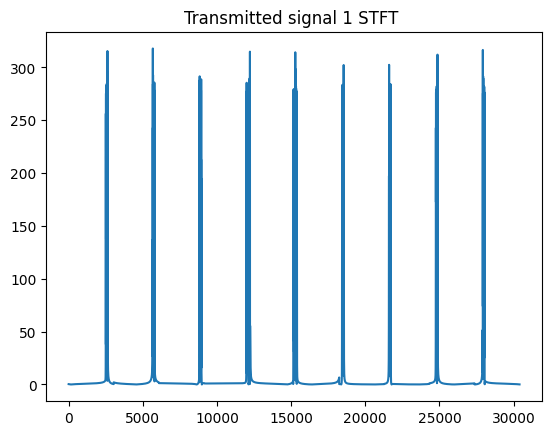

<ipython-input-11-ae052f578217>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  detected_signal_stft[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]=stft


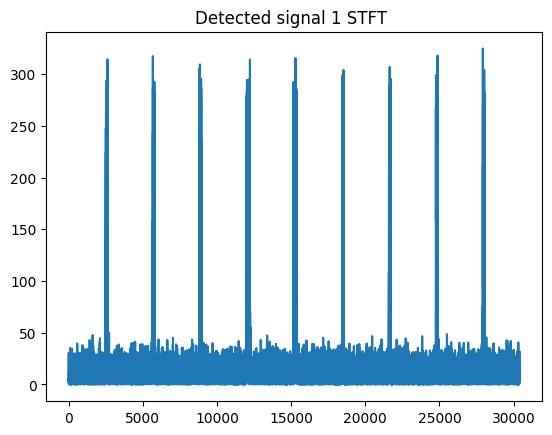

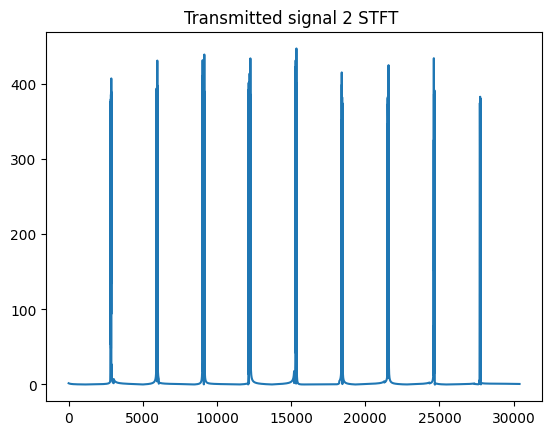

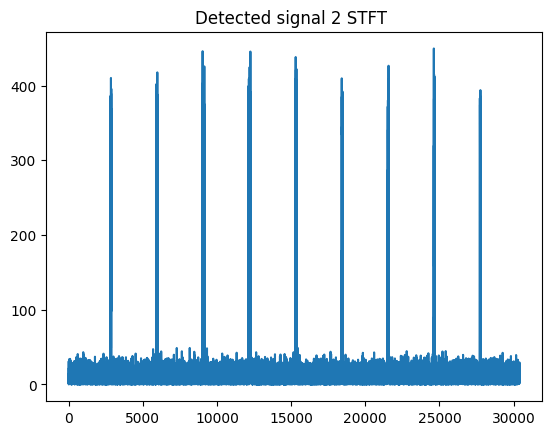

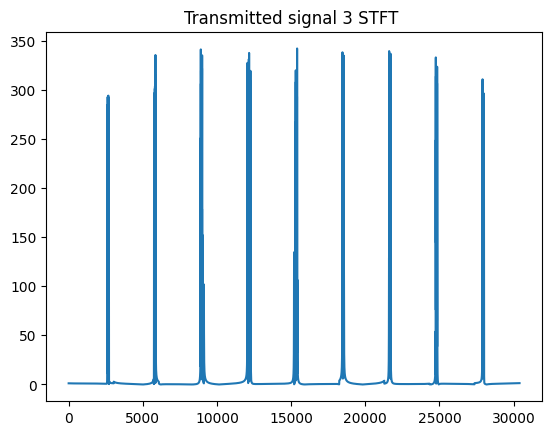

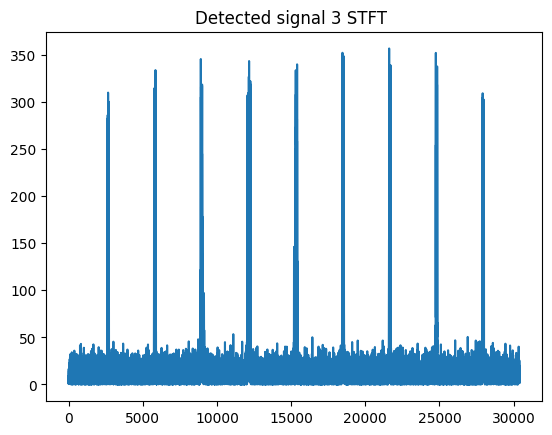

In [ ]:
i=1j
sigma=0.22
noise_real=cp.random.normal(0,sigma,np.shape(signal)[0])
noise_image=cp.random.normal(0,sigma,np.shape(signal)[0])
noise=noise_real+i*noise_image
noisy_signal=signal+noise
print("The SNR : ",my_snr(signal,noisy_signal))
for i in range(3):
  transmitted_signal=signal[i*(int(T_c * f_s)+int(10**(-7)*f_s)):i*(int(T_c * f_s)+int(10**(-7)*f_s))+int(T_c * f_s)]
  transmitted_signal_stft=cp.zeros(int(T_c * f_s))
  for u in range(10):
    signal_1=transmitted_signal[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]
    stft=cp.fft.fft(signal_1)
    transmitted_signal_stft[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]=stft
  plt.plot(cp.asnumpy(cp.abs(transmitted_signal_stft)))
  plt.title("Transmitted signal "+str(i+1)+" STFT ")
  plt.show()
  detected_signal=noisy_signal[i*(int(T_c * f_s)+int(10**(-7)*f_s)):i*(int(T_c * f_s)+int(10**(-7)*f_s))+int(T_c * f_s)]
  detected_signal_stft=cp.zeros(int(T_c * f_s))
  for u in range(10):
    signal_1=detected_signal[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]
    stft=cp.fft.fft(signal_1)
    detected_signal_stft[int(T_c * f_s)/10*u:int(T_c * f_s)/10*(u+1)]=stft
  plt.plot(cp.asnumpy(cp.abs(detected_signal_stft)))
  plt.title("Detected signal "+str(i+1)+" STFT ")
  plt.show()


Loading the chirp 13 and 43 datas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import scipy
my_data1 = scipy.io.loadmat('/content/drive/MyDrive/my_data1.mat')
my_data2 = scipy.io.loadmat('/content/drive/MyDrive/my_data2.mat')
my_data1=my_data1['my_data1']/(np.sqrt(np.mean(np.power(np.abs(my_data1['my_data1']),2))))
my_data2=my_data2['my_data2']/(np.sqrt(np.mean(np.power(np.abs(my_data2['my_data2']),2))))

Processing the chirp 13 without STFT method.

In [ ]:
minimum_distance=100000
detected_l=0
detected_m=0
for j in range(128):
  for k in range(64):
    compared_chirp=chirps[j][k]
    distance=cp.mean(cp.abs(cp.power(cp.abs(cp.reshape(cp.array(my_data1),(30400))[0:30399]-compared_chirp),2)))
    if(distance<minimum_distance):
      minimum_distance=distance
      detected_l=j
      detected_m=k
print("Chirp number 13")
print("Initial frequency : ",-100+200*detected_m/64,"MHz")
print("Bandwidth : ",400+400*detected_l/128,"MHz")

Chirp number 13
Initial frequency :  93.75 MHz
Bandwidth :  409.375 MHz


Processing the chirp 43 without STFT method.

In [ ]:
minimum_distance=100000
detected_l=0
detected_m=0
for j in range(128):
  for k in range(64):
    compared_chirp=chirps[j][k]
    distance=cp.mean(cp.abs(cp.power(cp.abs(cp.reshape(cp.array(my_data2),(30400))[0:30399]-compared_chirp),2)))
    if(distance<minimum_distance):
      minimum_distance=distance
      detected_l=j
      detected_m=k
print("Chirp number 43")
print("Initial frequency : ",-100+200*detected_m/64,"MHz")
print("Bandwidth : ",400+400*detected_l/128,"MHz")

Chirp number 43
Initial frequency :  -50.0 MHz
Bandwidth :  659.375 MHz


Processing the chirp 13 with STFT method.

In [ ]:
minimum_distance=1000000
detected_l=0
detected_m=0
signal_stft=cp.zeros(int(T_c * f_s))
for u in range(10):
  my_data1=cp.array(np.reshape(my_data1,(30400)))
  signal_1=my_data1[int(30399/10*u):int(30399/10*(u+1))]
  stft=cp.fft.fft(signal_1)
  signal_stft[int(int(T_c * f_s)/10*u):int(int(T_c * f_s)/10*(u+1))]=stft
for j in range(128):
  for k in range(64):
    compared_chirp_stft=STFT[j][k]
    distance=cp.mean(cp.abs(cp.power(cp.abs(signal_stft-compared_chirp_stft),2)))
    if(distance<minimum_distance):
      minimum_distance=distance
      detected_l=j
      detected_m=k
print("Chirp number 13")
print("Initial frequency : ",-100+200*detected_m/64,"MHz")
print("Bandwidth : ",400+400*detected_l/128,"MHz")

<ipython-input-22-923de865c012>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_stft[int(int(T_c * f_s)/10*u):int(int(T_c * f_s)/10*(u+1))]=stft


Chirp number 13
Initial frequency :  87.5 MHz
Bandwidth :  440.625 MHz


Processing the chirp 43 with STFT method.

In [ ]:
minimum_distance=1000000
detected_l=0
detected_m=0
signal_stft=cp.zeros(int(T_c * f_s))
for u in range(10):
  my_data2=cp.array(np.reshape(my_data2,(30400)))
  signal_2=my_data2[int(30399/10*u):int(30399/10*(u+1))]
  stft=cp.fft.fft(signal_2)
  signal_stft[int(int(T_c * f_s)/10*u):int(int(T_c * f_s)/10*(u+1))]=stft
for j in range(128):
  for k in range(64):
    compared_chirp_stft=STFT[j][k]
    distance=cp.mean(cp.abs(cp.power(cp.abs(signal_stft-compared_chirp_stft),2)))
    if(distance<minimum_distance):
      minimum_distance=distance
      detected_l=j
      detected_m=k
print("Chirp number 43")
print("Initial frequency : ",-100+200*detected_m/64,"MHz")
print("Bandwidth : ",400+400*detected_l/128,"MHz")

<ipython-input-23-281a8eb0804a>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_stft[int(int(T_c * f_s)/10*u):int(int(T_c * f_s)/10*(u+1))]=stft


Chirp number 43
Initial frequency :  -50.0 MHz
Bandwidth :  659.375 MHz


----
----
## DNN estimatior

In [3]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader,Dataset
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from torch.optim import Adam
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
class Chirp_detector(nn.Module):
    def __init__(self):
        super(Chirp_detector, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=8,padding='same')
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5)
        self.bn2 = nn.BatchNorm1d(256)
        self.relu2 = nn.ReLU()

        self.conv3 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3)
        self.bn3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()

        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)

        self.linear = nn.Linear(128, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)

        x = self.global_avg_pool(x)

        x = x.view(x.size(0), -1)

        x = self.linear(x)

        return x


In [ ]:
# Create an instance of the CNN model
model = Chirp_detector().to(device=device)

# Print the model's architecture
print(model)

### define `Dataset` :

In [ ]:
class CocoDataset(Dataset):
    def __init__(self, num_objects,dataset):
        self.coco_dataset = dataset
        self.num_objects = num_objects

    def convert_to_one_hot(self,numbers, size):
        one_hot_vector = np.zeros(size)
        one_hot_vector[numbers] = 1
        return torch.from_numpy(one_hot_vector)

    def __getitem__(self, index):
        """
        target  >>   a 90d multi-hot vector  [obj1 ,obj2, ... , obj90]
        obj1 = 1,  it means there is object 1 in the image.
        obj1 = 1,  it means there is not object 1 in the image.
        """
        data,target = self.coco_dataset[index]
        objects_list = [target[i]['category_id']-1 for i in range(len(target))]
        # print(objects_list)
        return data , self.convert_to_one_hot(objects_list,self.num_objects)

    def __len__(self):
        return len(self.coco_dataset)

### define `DataLoader` :

In [ ]:
batch_size = 64
# define transformer for data preprocessing
transformer = transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,)),
                        transforms.Lambda(lambda x: x.view(-1))])

train_data_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True)
train_data_loader2 = DataLoader(train_dataset2, batch_size=b_size, shuffle=True)

In [ ]:
for (data, targets) in tqdm(train_data_loader):
    index = 0
    plt.imshow(data[0].numpy().transpose(1, 2, 0))
    print(targets[0])
    break